<a href="https://colab.research.google.com/github/yihong1011/TibameML/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用迴歸法製作波士頓房價預測
CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千元

In [3]:
# 整理資料/資料預處理
# pandas兩個型態: DataFrame(表格, 2D)/Series(一行/一列, 1D)
# 資料的量到底要多少才夠?
# 看你的問題的難易度來決定(簡單: 少一點 難: 多一點) 欄位數量(少: 簡單 多: 難)
# ML: 千-萬  DL: 萬-十萬
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["ans"] = boston["target"]
# df.to_csv("boston.csv", encoding="utf-8", index=False)
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# 切成兩份
# 資料整理/預處理: pandas 機器學習: numpy
import numpy as np
# 型態: numpy array
x = boston["data"]# 設x為題目
y = boston["target"]# 設y為正確答案

In [5]:
# 分割原始資料做訓練組與測試組
from sklearn.model_selection import train_test_split
# 大部分人會9:1/8:2切
# [90%x, 10%x, 90%y, 10%y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [18]:
# 設置決策樹(迴歸法 Regressor)
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

[Text(0.5436046511627907, 0.9166666666666666, 'RM <= 6.838\nsquared_error = 86.598\nsamples = 455\nvalue = 22.519'),
 Text(0.27325581395348836, 0.75, 'LSTAT <= 14.4\nsquared_error = 39.934\nsamples = 376\nvalue = 19.648'),
 Text(0.10465116279069768, 0.5833333333333334, 'DIS <= 1.385\nsquared_error = 26.521\nsamples = 219\nvalue = 23.108'),
 Text(0.046511627906976744, 0.4166666666666667, 'B <= 339.985\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.023255813953488372, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.06976744186046512, 0.25, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.16279069767441862, 0.4166666666666667, 'RM <= 6.543\nsquared_error = 13.241\nsamples = 214\nvalue = 22.583'),
 Text(0.11627906976744186, 0.25, 'LSTAT <= 7.57\nsquared_error = 7.73\nsamples = 173\nvalue = 21.513'),
 Text(0.09302325581395349, 0.08333333333333333, 'squared_error = 3.277\nsamples = 37\nvalue = 24.089'),
 Text(0.13953488372093023, 0.08333333333333333

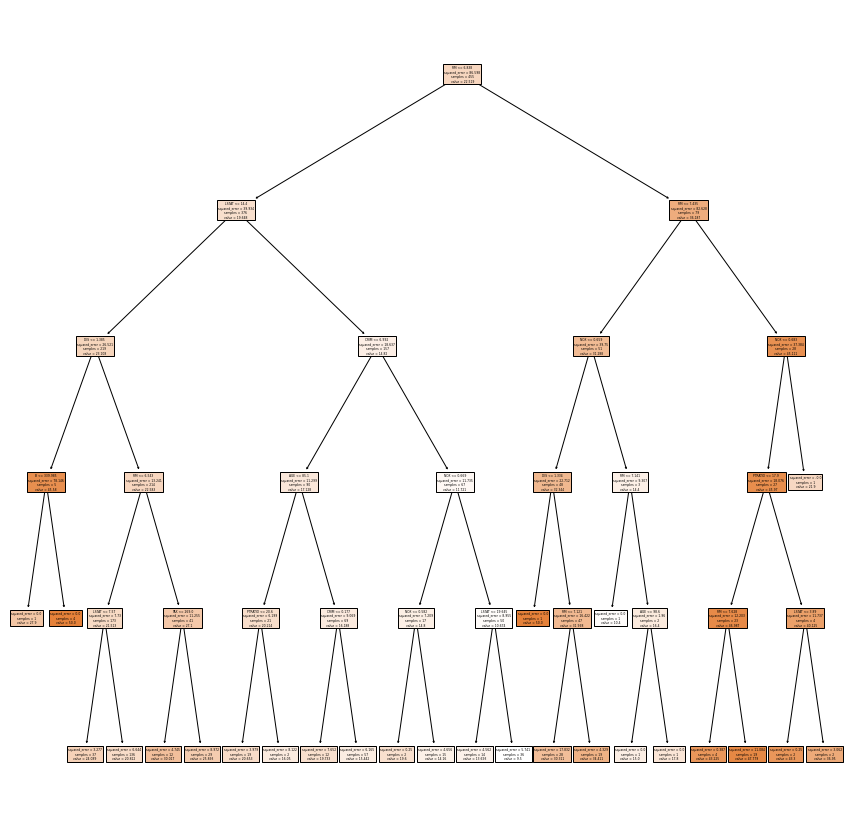

In [19]:
# 繪出決策樹來觀看
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(reg, 
     feature_names=boston["feature_names"],
     filled=True,
     )

In [20]:
# 預測(predict)
pre = reg.predict(x_test)
print("預測房價結果:", list(pre))
print("正確房價答案:", list(y_test))

預測房價結果: [20.81176470588235, 47.77894736842106, 19.733333333333334, 20.81176470588235, 9.499999999999998, 20.81176470588235, 24.089189189189195, 20.81176470588235, 13.692857142857141, 15.442105263157893, 13.692857142857141, 25.893103448275863, 34.410526315789475, 34.410526315789475, 20.81176470588235, 20.81176470588235, 20.81176470588235, 15.442105263157893, 15.442105263157893, 20.652631578947368, 15.442105263157893, 19.733333333333334, 24.089189189189195, 24.089189189189195, 34.410526315789475, 24.089189189189195, 25.893103448275863, 25.893103448275863, 19.733333333333334, 24.089189189189195, 20.81176470588235, 43.225, 16.049999999999997, 30.01666666666667, 15.442105263157893, 20.81176470588235, 24.089189189189195, 20.81176470588235, 20.81176470588235, 30.310714285714287, 20.81176470588235, 20.81176470588235, 9.499999999999998, 20.81176470588235, 20.81176470588235, 30.310714285714287, 30.310714285714287, 19.733333333333334, 9.499999999999998, 13.692857142857141, 20.81176470588235]
正確房價

In [21]:
# 評估標準
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.7744978490019866